I attended a (virtual) talk a few weeks ago by this guy Nigel Noyes. He's Principal Data Scientist at Quicken Loans, and I think it's fair to say this is quite the credential in and of itself, but by all means look him up; he's done quite a bit of interesting work over the course of his career. This article won't be about the talk he gave, which was an experience where the sheer level of detail presented for an ostensibly familiar structure was enough to scare me off applying to any of the positions that were open at that time. Nonetheless, my background is in Mortgage Finance, and Quicken Loans would be a fantastically cool place to work, if for no other reason than the chance to learn from people like Nigel. So a few weeks went by and I figured I'd look him up again, and I found this interview (https://www.linkedin.com/pulse/sg10-solutions-qa-nigel-noyes-data-science-andy-cooper/) he gave awhile ago.

There's a lot to unpack in the piece, and I'd be the first to admit that I don't meet all of his criteria for an ideal candidate (his discussion of the distinction between "Data Scientist" and "Data Engineer", for example is something to aspire to both technically and as a more global understanding of how the field works-- spoiler: he makes a very sensible case for what he describes as the "European approach, which is more holistic"). I was, however, struck by his comment that he has "interviewed candidates with advanced degrees in statistics that didn't know how to code linear regression from scratch without using a library."

"Aha!" I thought. "I bet I could do that!"

A disclaimer to the reader: I do not have any advanced degree in statistics. In fact, I do not have any advanced degree at all, and my undergraduate degree is in Russian, not math. Further, I was a horrible student, and it turns out when you stop attending your classes without formally dropping them, they fail you. So I have an "F" in linear algebra (among a couple other things). Lesson learned. That was a long time ago and now I'd actually love to do a master's in math, so this is a nice excuse to show some I'm able to do some linear algebra at at least a basic level. I don't claim this solution is the most efficient, and in fact I'd imagine it fails some edge cases where the coefficients end up very close to zero, but we'll save Gradient Descent and co. for another day. If you do find some obvious error with my approach though, or you have a much better way to do this, by all means let me know! I love to learn!

That said, let's get started!

What is Linear Regression? Fundamentally, this is one of the easiest models to understand. The idea is that we hypothesize that there is some linear function which maps the feature space of our problem to it's outputs. It is almost never the case that there is such a perfect line, so our goal is to find the line that best fits the data. We define "best fit" by writing a very simple cost function, which starts with quantifying our errors at each point: y (our target, or the actual values being modeled) - y_hat (our predictions). In order to count an underprediction in the same manner as an overprediction (-3, and 3 are both an "off by three" error, so to speak), we square these errors. Linear Regression by the least squares method is simply finding the coefficients that minimize the sum of these squared errors term (hence, least squares).


Since by definition we're solving a linear system, and our goal will be to find the coefficients theta for the equation y = theta*X that minimize the sum of squared differences between our predictions and the target variable y (the "least squares method"), we can make use of a well-known formula called the normal equation. Wolfram defines (https://mathworld.wolfram.com/NormalEquation.html) this equation as "that which minimizes the sum of the square distances between the left and right sides" of the equation Ax = b, perfect!

The normal equation is written as:

A.T * A * x = A.T * b

Okay, we can unpack some of that. Let's start with "least squares", which if you'll remember refers to the optimal (read smallest) solution to the expression sum( y - Theta*X )^2. We square our errors to ensure that a prediction that is too small is treated the same as one that is too large. Since y and X (target and features, respectively) are given, our goal is to find the coefficients Theta that minimize this equation.




Presumably "without using a library" means without using some sort of existing linear regression model (like, for example, scikit-learn's LinearRegression, which we will use as a baseline to compare our scratch version), rather than without any library at all (numpy, for example has several useful methods for matrix operations).

In [1]:
import numpy as np

class LinRegScratch():
    def __init__(self):
        pass
    def fit(self, X, y):
        # add an intercept column to X
        X_with_intercept = np.c_[np.ones((X.shape[0],1)), X]
        # make this accessible after fitting
        self.X_intercept = X_with_intercept

        self.thetas = np.linalg.inv(X_with_intercept.T.dot(X_with_intercept)).dot(X_with_intercept.T).dot(y)
        return self


    def predict(self, X):
        thetas = self.thetas
        X_predictor = np.c_[np.ones((X.shape[0],1)), X]
        self.predictions = X_predictor.dot(thetas)
        return self.predictions


    

Let's test this with a single X feature first

In [2]:
y = np.array([3,5,7,9]).reshape(4,1)
X = np.c_[np.ones((4,1)), [1,2,3,4]]
np.matrix(X.T)

matrix([[1., 1., 1., 1.],
        [1., 2., 3., 4.]])

In [22]:
from sklearn.linear_model import LinearRegression

X = np.array([*range(1,101)]).reshape(100,1)
y = 10 + 7 * X + 10*np.random.randn(100, 1)

lin_reg_sklearn = LinearRegression()
lin_reg_scratch = LinRegScratch()

lin_reg_sklearn.fit(X, y)
sklearn_preds = lin_reg_sklearn.predict(X)

lin_reg_scratch.fit(X, y)
scratch_preds = lin_reg_scratch.predict(X)

X



array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
      

In [57]:
from sklearn.preprocessing import PolynomialFeatures

def make_x_y(deg=2):
    X = np.array([*range(-30,30)]).reshape(-1,1)

    poly_adder = PolynomialFeatures(degree=deg)
    X = poly_adder.fit_transform(X)

    thetas = np.array(2*np.random.randn(deg,1)).reshape(-1,1)

    y = X.dot(thetas)
    y += 15*np.random.randn(len(y), 1)
    return X, y



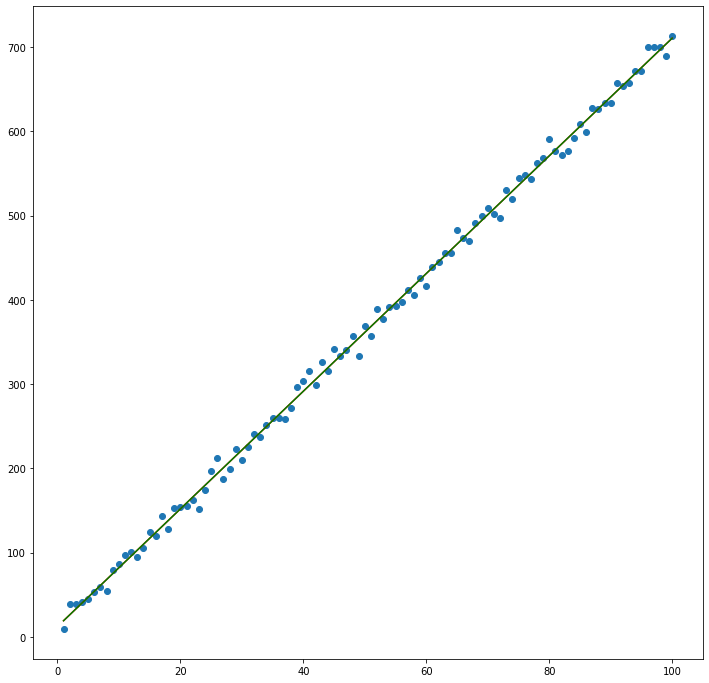

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(X, y)
ax.plot(X, sklearn_preds, color='Red')
ax.plot(X, scratch_preds, color='Green')
plt.show();
# fig.savefig('./figure.png')

We'll call mean_squared_error on the two sets of predictions as a quick sanity check

In [48]:
from sklearn.metrics import mean_squared_error

mean_squared_error(sklearn_preds, scratch_preds, squared=False)

6.638157807473511e-14

And since it looks pretty good let's design a quick test

In [49]:
def test_results(preds_a, preds_b, tolerance=0.0001):
    # takes array-like of two predictions of same length,
    # tests each pair of corresponding elements is within
    # +/- value passed in tolerance
    result_vec = np.abs(preds_a - preds_b) < tolerance
    if np.all(result_vec):
        return True, None
    else:
        # return False and list of indices where test fails
        return False, [(a,b) for a, b in zip(np.where(result_vec == False)[0], np.where(result_vec == False)[1])]


test_results(sklearn_preds, scratch_preds)

(True, None)

Let's also test this out on X for X with larger number of features

In [7]:
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y=True)

# We remove categorical features for 
# X = X


lin_reg_sklearn = LinearRegression()
lin_reg_scratch = LinRegScratch()

lin_reg_sklearn.fit(X, y)
sklearn_preds = lin_reg_sklearn.predict(X)

lin_reg_scratch.fit(X, y)
scratch_preds = lin_reg_scratch.predict(X)

scratch_residuals = y - scratch_preds
sklearn_residuals = y - sklearn_preds

In [51]:
test_results(sklearn_preds, scratch_preds)

(True, None)

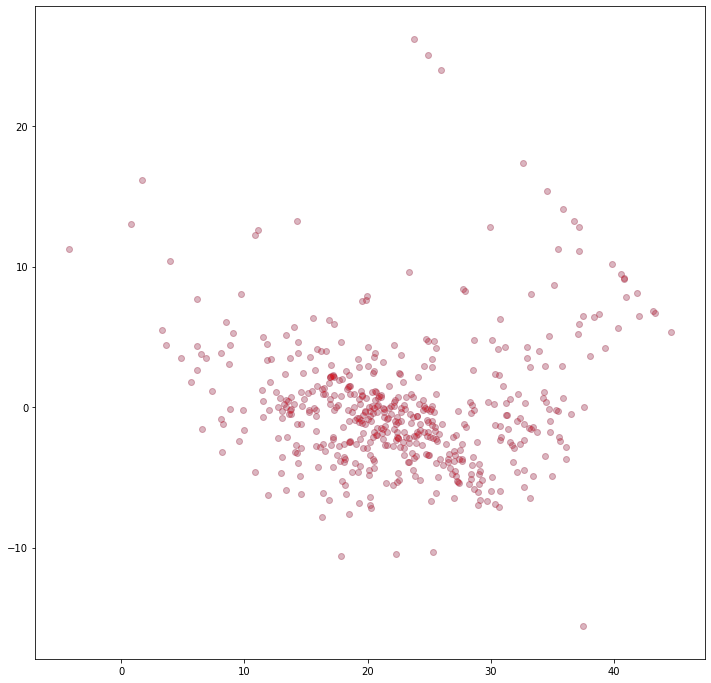

In [52]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,12))
plt.scatter(scratch_preds, scratch_residuals, alpha=0.2)
plt.scatter(sklearn_preds, sklearn_residuals, alpha=0.2, color='Red')
# plt.plot(X, sklearn_preds, color='Red')
# plt.plot(X, scratch_preds, color='Green')
plt.show();

In [63]:
X_numeric = np.delete(X, [3,8], axis=1)

In [60]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [22]:
def l2_norm(thetas):
    thetas_T = thetas.T
    return float(np.sqrt(thetas_T.dot(thetas)))

thetas = np.arange(1,6).reshape(-1, 1)

# Our function should return the same as np.linalg.norm since the default norm is the l2 norm
assert round(l2_norm(thetas), 8) == round(np.linalg.norm(thetas), 8)





In [18]:
class RidgeRegScratch():
    def __init__(self, alpha=1.0, solver='closed'):
        self.alpha = alpha
        self.solver = solver


    def fit(self, X, y):
        X_with_intercept = np.c_[np.ones((X.shape[0],1)), X]
        self.X_intercept = X_with_intercept
        if self.solver == 'closed':
            # number of columns in matrix of X including intercept
            dimension = X_with_intercept.shape[1]
            # Identity matrix of dimension compatible with our X_intercept Matrix
            A = np.identity(dimension)
            # set first 1 on the diagonal to zero so as not to include a bias term for
            # the intercept
            A[0,0] = 0
            # We create a bias term corresponding to alpha for each column of X not
            # including the intercept
            A_biased = self.alpha * A
            thetas = np.linalg.inv(X_with_intercept.T.dot(X_with_intercept) + A_biased).dot(X_with_intercept.T).dot(y)
        self.thetas = thetas
        return self
    
    def predict(self, X):
        thetas = self.thetas
        X_predictor = np.c_[np.ones((X.shape[0],1)), X]
        self.predictions = X_predictor.dot(thetas)
        return self.predictions



    


In [58]:
X, y = make_x_y(deg=5)

def plot_alphas(X,y, alphas=[0.1, 1, 10, 100]):
    for alpha in alphas:
        model = RidgeRegScratch(alpha=alpha)
        model.fit(X,y)
        predictions = model.predict(X)
        plt.scatter(X[:, 1], y)
        plt.plot(X[:, 1], predictions)
        plt.show()
plot_alphas(X, y)


ValueError: shapes (60,6) and (5,1) not aligned: 6 (dim 1) != 5 (dim 0)

In [15]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X, y = load_boston(return_X_y=True)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

ridge_sklearn = Ridge(alpha=0.2)
ridge_scratch = RidgeRegScratch(alpha=0.2)

ridge_sklearn.fit(X_scaled, y)
ridge_scratch.fit(X_scaled, y)

sklearn_ridge_preds = ridge_sklearn.predict(X_scaled)
scratch_ridge_preds = ridge_scratch.predict(X_scaled)

mean_squared_error(sklearn_ridge_preds, scratch_ridge_preds)

4.4401893507870325e-27

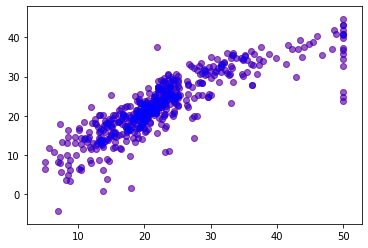

In [16]:
plt.scatter(y, sklearn_ridge_preds, color='Red', alpha=0.4)
plt.scatter(y, scratch_ridge_preds, color='Blue', alpha=0.4)

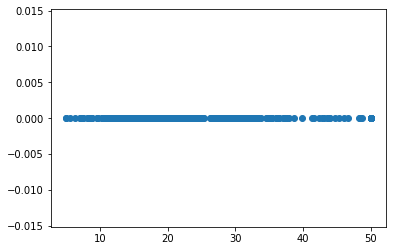

In [17]:
ridge_prediction_resids = scratch_ridge_preds - sklearn_ridge_preds
plt.scatter(y, ridge_prediction_resids)

In [70]:
mean_squared_error(y, scratch_preds)

21.8948311817292

Use the below cell to show the A matrix of bias terms for various alphas

In [42]:

X_with_intercept = ridge_reg.X_intercept
alpha = 1
dimension = X_with_intercept.shape[1]
A = np.identity(dimension)
# set first 1 on the diagonal to zero so as not to include a bias term for
# the intercept
A[0,0] = 0
A = alpha * A
A

array([[0., 0.],
       [0., 1.]])

In [43]:
y = 2*thetas
np.linalg.inv(X_with_intercept.T.dot(X_with_intercept) + A).dot(X_with_intercept.T).dot(y)
# y

array([[0.54545455],
       [1.81818182]])

In [21]:
X_with_intercept

NameError: name 'X_with_intercept' is not defined

In [39]:
X_with_intercept.T.dot(y)

array([[ 30.],
       [110.]])

In [40]:
y

array([[ 2],
       [ 4],
       [ 6],
       [ 8],
       [10]])

In [20]:
# Showing an example of A for X with 3 features and an intercept column:

A = np.identity(4)
A[0,0] = 0
A

array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])